---
title: Homework 1
author: Jichao Yang
format: 
    pdf:
        documentclass: article
        papersize: letter
        geometry:
            - top = 1in
            - bottom = 1in
            - left = 1in
            - right = 1in
---

# Problem 1
Unless specifically mentioned, the sum and product operators below all range within set $\{x_1, \cdots, x_8\}$.\
(a) Likelihood function can be found as follow:
$$
L = \prod P(X = x_i)= \prod e^{-\lambda} \frac{\lambda^{x_i}}{x_i!} = e^{-8\lambda} \cdot \frac{\lambda^{\sum x_i}}{\prod x_n!}
$$
(b) The log likelihood can be found as follow:
$$
{\mathcal L} = log(L) = -8\lambda + log(\lambda)\cdot \sum x_i - \sum log(x_i!)
$$
(c) Function ${\mathcal L}(\lambda) = c_0 + c_1\cdot \lambda + c_2\cdot ln(\lambda)$ is the sum of convex functions, hence ${\mathcal L}$ is convex. Therefore ${\mathcal L}$ reaches its maximum if and only if its derivative is 0. Solving this equation we have:
$$
\begin{aligned}
\frac{d}{d\lambda}{\mathcal L} &= -8 + \frac{1}{\lambda} \cdot \sum x_i = 0\\
\lambda &= \frac{1}{8}\sum{x_i}
\end{aligned}
$$

# Problem 2
(a) The estimation for $\lambda$ is

In [145]:
import numpy as np

counts = np.array([32,25,28,22,31,34,23,17])
l = sum(counts) / 8

print('The estimation for lambda is {}'.format(np.round(l,5)))

The estimation for lambda is 26.5


(b) Below is the function that calculates the negative log likelihood:

In [146]:
from scipy.special import factorial

def nll(l, counts):
    '''
    Returns the negative log likelihood of given observation counts and rate
    parameter l.
    '''
    return 8*l - np.log(l)*np.sum(counts) + np.sum(np.log(factorial(counts)))

(c) We use the Scipy optimizer to find the minimum negative loss:

In [147]:
from scipy.optimize import minimize

# Using initial guess 20 which is decently close to l
l_hat = minimize(nll, [20], args=counts).x[0]
# Does the analytic solution agree with the optimization?
assert np.isclose(l,l_hat)

print('The estimator found using scipy is {}'.format(np.round(l_hat, 5)))
print('The estimator calculated in Problem 1 is {}'.format(np.round(l, 5)))

The estimator found using scipy is 26.49999
The estimator calculated in Problem 1 is 26.5


The calculated estimator is reasonably close to the optimized estimator.

# Problem 3
(a) Denote the value of the two dice $d_1, d_2$. The conditional probability can be calculated with:
$$
P(d_1=4 | d_1+d_2=7) = \frac{P(d_1=4 \cap d_1+d_2=7)}{P(d_1+d_2=7)} = \frac{(1/6)^2}{(1/6)^2 \cdot 6} = \frac{1}{6}
$$

(b) Denote families owning dogs $D$ and cats $C$. The conditional probability can be calculated with:
$$
P(D|C) = \frac{P(D \cap C )}{P(C)} = \frac{1/3\cdot 0.6}{0.4} = \frac{1}{2}
$$

# Problem 4
(a) Denote the ordered set of throws $D = \{5,3,9,3,8,4,7\}$. We first calculate a few useful values for solving the problem:
$$
P(D|A) = \frac{3\cdot 3\cdot 2}{20^7} = \frac{18}{20^7};\quad P(D|B) = \frac{2^6}{20^7} = \frac{64}{20^7};\quad P(D|E) = \frac{2^7}{20^7} = \frac{128}{20^7}
$$
$$
P(D) = P(D|A)\cdot P(A) + P(D|B)\cdot P(B) + P(D|E)\cdot P(E) = \frac{1}{3}\cdot \frac{210}{20^7}
$$
Using the Bayes equation we have the following:
$$
P(A|D) = \frac{P(D|A)\cdot P(A)}{P(D)} = \frac{18}{210};\quad P(B|D) = \frac{64}{210};\quad P(E|D) = \frac{128}{210}
$$


(b) Take calculations done in step (a) as the prior. Denote $D'$ as the final die roll of 10. We can calculate the following:
$$
P(D') = P(D'|A) P(A) + P(D'|B)P(B) + P(D'|E) P(E) = 0\cdot \frac{18}{210} + \frac{1}{20}\cdot \frac{64}{210} + \frac{2}{20}\cdot \frac{128}{210} = \frac{16}{210}
$$

$$
P(A|D') = \frac{P(D'|A)\cdot P(A)}{P(D')} = \frac{0\cdot 18/210}{16/210} = 0;\quad P(B|D') = \frac{1}{5};\quad P(E|D') = \frac{4}{5}
$$

(c) The consequences of A being impossible to roll a 10 is that the posterior probability of A is 0. In other words, the prior probability of A becomes 'distributed' among B and C after the additional roll.

(d) Recall that given a set of rolls $D$, there is a established 99:1 confidence between B and E if and only if
$$
\frac{P(B|D)}{P(E|D)} \leq \frac{1}{99} \text{ or } \frac{P(B|D)}{P(E|D)} \geq \frac{99}{1}
$$
Given any prior rolls $D$, we can calculate the current value for $P(B)$ and $P(E)$. For new roll $D'$, the probability can be updated as follow:
$$
P(B|D') = \frac{P(D'|B)}{P(D')}\cdot P(B);\quad P(E|D') = \frac{P(D'|E)}{P(D')}\cdot P(E)
$$
Hence the quotient can be updated as follow:
$$
\frac{P(B|D')}{P(E|D')} = \frac{P(D'|B)}{P(D'|E)} \cdot \frac{P(B)}{P(E)}
$$
For accuracy of calculation, we define the log confidence as
$$
{\mathcal L} = log(\frac{P(B)}{P(E)})
$$
Hence the log confidence can be iteratively updated by the following rule
$$
{\mathcal L'} = {\mathcal L} + log(P(D'|B)) - log(P(D'|E))
$$
until we reach the breaking condition
$$
{\mathcal L'} \leq -log(99) \text{ or } {\mathcal L'} \geq log(99)
$$
Below is the implementation of the algorithm:

It takes 88 rolls on average to establish a 99:1 confidence


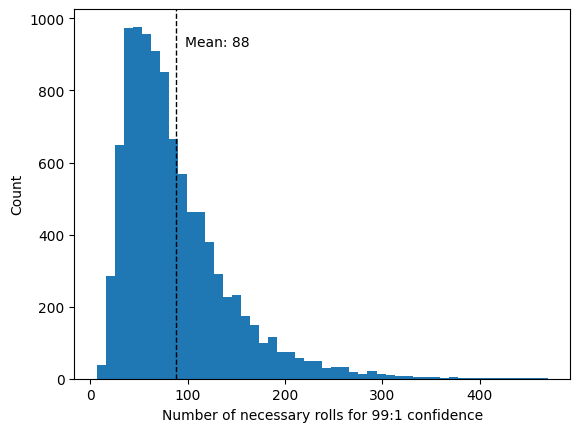

In [180]:
#| label: fig-hist
#| fig-cap: "Number of rolls necessary on average for 99:1 confidence"

import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set up dice rolls
B = [1,1,1,2,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,10]
E = [1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10]
B_chance = {
    1: 3/20, 2: 3/20, 3: 2/20, 4: 2/20, 5: 2/20,
    6: 2/20, 7: 2/20, 8: 2/20, 9: 1/20, 10: 1/20
}
E_chance = {
    1: 2/20, 2: 2/20, 3: 2/20, 4: 2/20, 5: 2/20,
    6: 2/20, 7: 2/20, 8: 2/20, 9: 2/20, 10: 2/20
}

def simulate():
    '''
    Returns the needed number of rolls to establish 99:1
    confidence for one simulation.
    '''
    # Set up simulation parameters
    loss = 0    # assume equal starting chance, hence log(1)
    roll_count = 0
    is_B = random.choice([True, False]) # Pick a die at random

    # Begin simulation
    while(abs(loss) <= np.log(99)):
        # Roll the die
        roll_val = random.choice(B) if is_B else random.choice(E)
        # Update loss
        loss = loss + np.log(B_chance[roll_val]) - np.log(E_chance[roll_val])
        roll_count += 1
    return roll_count

# Find out the mean of the necessary roll counts
n = 10000; results = []
for i in range(n):
    results.append(simulate())
mean = np.mean(results)
plt.hist(results, bins=50)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
plt.text(mean*1.1, plt.ylim()[1]*0.9, 'Mean: {:.0f}'.format(mean))
plt.xlabel('Number of necessary rolls for 99:1 confidence')
plt.ylabel('Count')
print('It takes {:.0f} rolls on average to establish a 99:1 confidence'.format(mean))
plt.show()

# Problem 5

(a) The probability of making $k$ of 18 throws is
$$
P(k|p) = \frac{18!}{(18-k)!\cdot k!}\cdot p^k \cdot (1-p)^{18-k}
$$
(b) The likelihood function for $\pi$ is
$$
\begin{aligned}
P(\pi |k) &= \frac{P(k|\pi)\cdot P(\pi)}{P(k)} \sim P(k|\pi)\\
&\sim p^k\cdot (1-p)^{18-k}
\end{aligned}
$$
(c) Observe that the likelihood function for $\pi$ is convex in $[0,1]$. The negative log likelihood function ${\mathcal L}$ as
$$
{\mathcal L} = -log(p^k\cdot (1-p)^{18-k}) = (-k)\cdot log(p) + (k-18)\cdot log(1-p)
$$
Given convexity, to find the minimum of ${\mathcal L}$, we find the zero for its derivative.
$$
\begin{aligned}
\frac{d{\mathcal L}}{dp} &= -\frac{k}{p} + \frac{18-k}{1-p} = 0\\
\hat{p} &= \frac{k}{18}
\end{aligned}
$$
(d) Given $k=12$, we can calculate
$$
\hat{p} = \frac{12}{18} = \frac{2}{3}
$$